In [6]:
import os
from tabulate import tabulate

import numpy as np
import torch
import torch.utils.data as data
import matplotlib.pyplot as plt
import seaborn
seaborn.set()

from agent import agent_wrapper, run_agent
from run_expert import run_expert
from train import train_bc_agent, train_dagger_agent
from config import Config

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
returns = {}
for filename in os.listdir('./experts/'):
  env_name = filename[:-4]
  print("*"*10, f"Training {env_name}", "*"*10)
  config = Config(env_name)
  bc_agent, train_losses, test_losses, _ = train_bc_agent(f"./experts/{filename}", config)
  dagger_agent, train_losses, test_losses = train_dagger_agent(f"./experts/{filename}", config)
  
  returns[env_name] = {}
  
  _, _, returns[env_name]['expert'] = run_expert(f"./experts/{filename}", config)
  _, _, returns[env_name]['bc'] = run_agent(agent_wrapper(bc_agent, config), config)
  _, _, returns[env_name]['dagger'] = run_agent(agent_wrapper(dagger_agent, config), config)

Rollouts:  25%|██▌       | 5/20 [00:00<00:00, 20.51it/s]

********** Training Ant-v2 **********
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


Rollouts: 100%|██████████| 20/20 [00:00<00:00, 102.75it/s]

********** Training HalfCheetah-v2 **********
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.



Rollouts:  60%|██████    | 12/20 [00:00<00:00, 52.33it/s]

********** Training Hopper-v2 **********
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


Rollouts:  50%|█████     | 10/20 [00:00<00:00, 45.85it/s]

********** Training Walker2d-v2 **********
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


Epochs:   0%|          | 0/10 [00:00<?, ?it/s]

********** Training Reacher-v2 **********
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


Rollouts:  10%|█         | 2/20 [00:00<00:01, 12.76it/s]

********** Training Humanoid-v2 **********
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


Rollouts: 100%|██████████| 20/20 [00:01<00:00, 14.47it/s]


agent type      Mean Return     Stdev
------------  -------------  --------
expert             413.93    49.084
bc                  92.3439   1.93935
dagger             387.659   35.5998


agent type      Mean Return      Stdev
------------  -------------  ---------
expert            289.251    22.0849
bc                 -1.30211   0.809616
dagger            210.815    35.2873


agent type      Mean Return     Stdev
------------  -------------  --------
expert             227.78    0.570026
bc                  32.8568  1.81127
dagger             226.793   0.489125


agent type      Mean Return    Stdev
------------  -------------  -------
expert             221.488   1.40912
bc                  89.8418  1.46443
dagger             216.024   1.89291


agent type      Mean Return    Stdev
------------  -------------  -------
expert             -4.20411  2.16422
bc                 -9.62657  3.48458
dagger             -9.00958  2.65364


agent type      Mean Return      Stdev
------------  

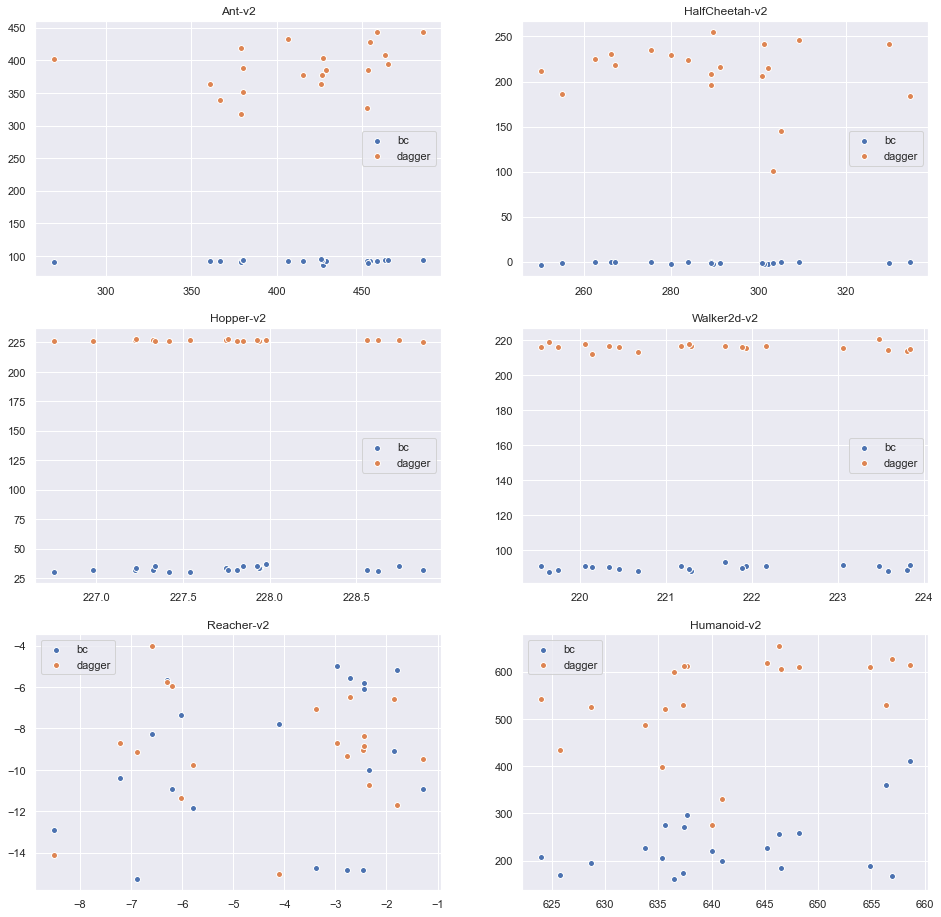

In [39]:
fig, axs = plt.subplots(3, 2, figsize=(16, 16))
for i, env in enumerate(returns.keys()):
  data = []
  for name in ['expert', 'bc', 'dagger']:
    r = returns[env]
    data.append([name, np.mean(r[name]), np.std(r[name])])
    
    if name == 'expert':
      continue

    x, y = divmod(i, 2)
      
    axs[x][y].scatter(r['expert'], r[name], edgecolors='w', label=f"{name}")
    axs[x][y].set_title(env)
    axs[x][y].legend()  

  print(tabulate(data, headers=['agent type', 'Mean Return', 'Stdev'], tablefmt='simple'))
  print("\n")


plt.show()
